## Unequal sized subsets in K-L Algorithm

### Suppose P1 has $n_1$ nodes and P2 has $n_2$ nodes where $n_2 > n_1$.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class Graph:
    def __init__(self):
        self.adj_list = []
        self.nodes = []
        self.num_nodes = 0
        self.node_affiliation = {}
        self.cxy = {}
    
    def addNode(self, node, affiliation):
        self.num_nodes += 1
        self.nodes.append(node)
        self.node_affiliation[node] = affiliation
    
    def delNode(self, nodes):
        for i in nodes:
            self.nodes.remove(i)

    def addEdge(self, a, b, w):
        if(a in self.nodes and b in self.nodes):
            t, l = (min(a,b), max(a,b))
            for i in range(len(self.adj_list)):
                if(self.adj_list[i][0] == t and self.adj_list[i][1] == l):
                    self.adj_list[i][2] += w
                    self.cxy[t+l] = self.adj_list[i][2]
                    return
            self.adj_list.append([t, l, w])
            self.cxy[t+l] = w
        else:
            print("This node is not declared")
    
    def get_cost(self):
        cost = 0
        d = self.node_affiliation
        for i in self.adj_list:
            if(d[i[0]] != d[i[1]]):
                cost += i[2]
        return cost

    def IE(self, node):
        #(internal, external) cost of nodes
        internal, external = 0, 0
        d = self.node_affiliation
        p = d[node]
        for i in self.adj_list:
            if(i[0] == node):
                if(d[i[1]] != p):
                    external += i[2]
                else:
                    internal += i[2]
            elif(i[1] == node):
                if(d[i[0]] != p):
                    external += i[2]
                else:
                    internal += i[2]
            else:
                pass
        return (internal, external)

class GraphVisualizer:
    def __init__(self):
        self.G = nx.Graph()

    def addEdges(self, graph):
        self.graph = graph
        for i in graph.nodes:
            self.G.add_node(i)
        for i in graph.adj_list:
            self.G.add_edge(i[0], i[1], weight=i[2])
        
    def visualize(self, text="Network Visualized"):
        nodes = self.graph.nodes
        p1 = [i for i in nodes if self.graph.node_affiliation[i] == 'p1']
        colors = ['red' if n in p1 else 'green' for n in list(self.G.nodes)]
        pos = nx.circular_layout(self.G)
        nx.draw_networkx(self.G, pos, node_color = colors)
        labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.title(text)
        plt.show()

In [2]:
def kerninghan_lin(graph):
    nodes = graph.nodes
    increments = []
    prefix = [0]
    swaps = []
    swapped = {}
    d = graph.node_affiliation

    sort_str = lambda x: ''.join(sorted(x))
    for i in nodes:
        swapped[i] = False
    
    n = len(nodes)//2
    first = True

    I, E, D = {},{},{}
    
    for i in range(n):
        newnodes = [i for i in nodes if not swapped[i]]
        p1 = [i for i in newnodes if graph.node_affiliation[i] == 'p1']
        p2 = [i for i in newnodes if i not in p1]
        p1.sort()
        p2.sort()
        
        G = {}
        for i in newnodes:
            if first:
                I[i],E[i] = graph.IE(i)
                D[i] = E[i] - I[i]
            else:
                x = swaps[len(swaps) - 1]
                s1,s2 = sort_str(i+x[0]), sort_str(i+x[1])
                if(d[x[0]] == d[i]):
                    D[i] = D[i] + (2*graph.cxy.get(s1, 0) - 2*graph.cxy.get(s2, 0))
                else:
                    D[i] = D[i] - (2*graph.cxy.get(s1, 0) - 2*graph.cxy.get(s2, 0))
        if first:
            first = False
        
        for i in p1:
            for j in p2:
                G[i+j] = D[i] + D[j] - 2*graph.cxy.get(i+j, 0)
        
        swap = max(G, key=G.get)
        increments.append(G[swap])
        swaps.append(swap)

        swapped[swap[0]] = True
        swapped[swap[1]] = True
    
    for i in range(len(increments)):
        prefix.append(increments[i] + prefix[i])
    
    maxim_ind = np.argmax(prefix)
    return (swaps, maxim_ind-1)

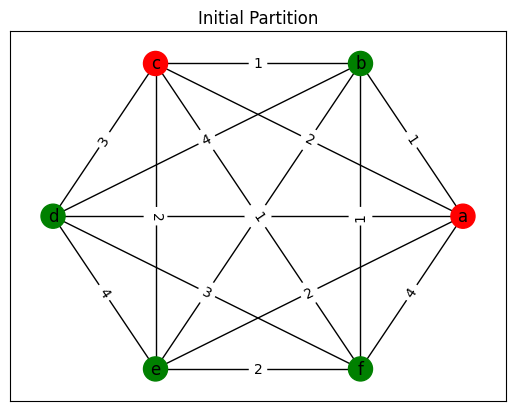

The wire cost of partitioning is 17


In [3]:
graph = Graph()

# here n2 = 4 and n1 = 2

graph.addNode('a', 'p1')
graph.addNode('b', 'p2')
graph.addNode('c', 'p1')
graph.addNode('d', 'p2')
graph.addNode('e', 'p2')
graph.addNode('f', 'p2')

graph.addEdge('a','f', 4)
graph.addEdge('a','e', 2)
graph.addEdge('a','d', 3)
graph.addEdge('a','b', 1)
graph.addEdge('a','c', 2)
graph.addEdge('b','c', 1)
graph.addEdge('b','d', 4)
graph.addEdge('b','e', 2)
graph.addEdge('b','f', 1)
graph.addEdge('c','d', 3)
graph.addEdge('c','e', 2)
graph.addEdge('c','f', 1)
graph.addEdge('d','e', 4)
graph.addEdge('d','f', 3)
graph.addEdge('e','f', 2)

gv = GraphVisualizer()
gv.addEdges(graph)
gv.visualize("Initial Partition")
print("The wire cost of partitioning is",graph.get_cost())

In [4]:
import string

def uneq_kerninghan_lin(graph):
    nodes = graph.nodes

    n1 = len([i for i in nodes if graph.node_affiliation[i] == 'p1'])
    n2 = len(nodes) - n1

    addednodes = []

    if(n2 > n1):
        for i in range(n2-n1):
            x = [i for i in string.ascii_letters if i not in nodes][0]
            graph.addNode(x,'p1')
            addednodes.append(x)
    else:
        for i in range(n1-n2):
            x = [i for i in string.ascii_letters if i not in nodes][0]
            graph.addNode(x,'p2')
            addednodes.append(x)

    print(addednodes,"were the nodes added")
    
    swaps,m = kerninghan_lin(graph)

    k = 0
    
    while(k <= m):
        p = swaps[k]
        graph.node_affiliation[p[0]], graph.node_affiliation[p[1]] = graph.node_affiliation[p[1]], graph.node_affiliation[p[0]]
        gv = GraphVisualizer()
        gv.addEdges(graph)
        gv.visualize(f"After swap {k+1}")
        print("The wire cost of partitioning is",graph.get_cost())
        k += 1
    
    for x in addednodes:
        graph.delNode(x)
    
    gv = GraphVisualizer()
    gv.addEdges(graph)
    gv.visualize(f"Network topology after removing dummy nodes")


['g', 'h'] were the nodes added


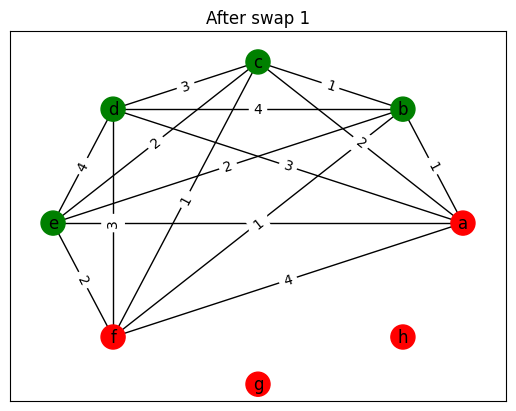

The wire cost of partitioning is 15


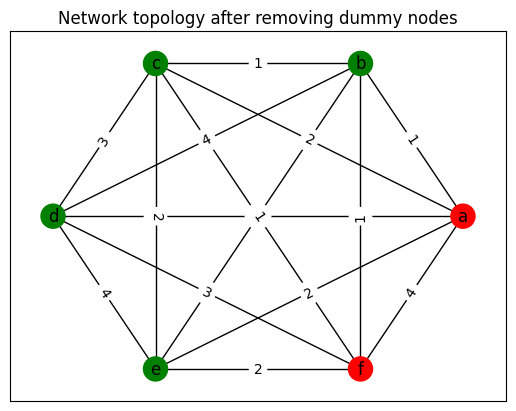

In [5]:
uneq_kerninghan_lin(graph)